# Домашняя работа по регуляризации и оптимизации

Ниже приводится корпус данных с двумя метками: 1 и -1. К данным применяется линейная модель классификации:

$f(x, \theta) = x_1 \theta_1 + x_2 \theta_2 + \theta_3.$

Предлагается подобрать параметры $\theta$ минимизируя следующую функцию ошибки:

$\mathcal{L}(\theta) = 0.1 \|\theta\|^2 + \frac{1}{N}\sum\limits_{i=1}^N \max(0, 1 - y_i f(x_i, \theta)).$

Для оптимизации предлагается использовать метод градиентного спуска с 1000 шагами размера $0.1$ из начальной точки $(1, 1, 0)$.

Вывод градиента:
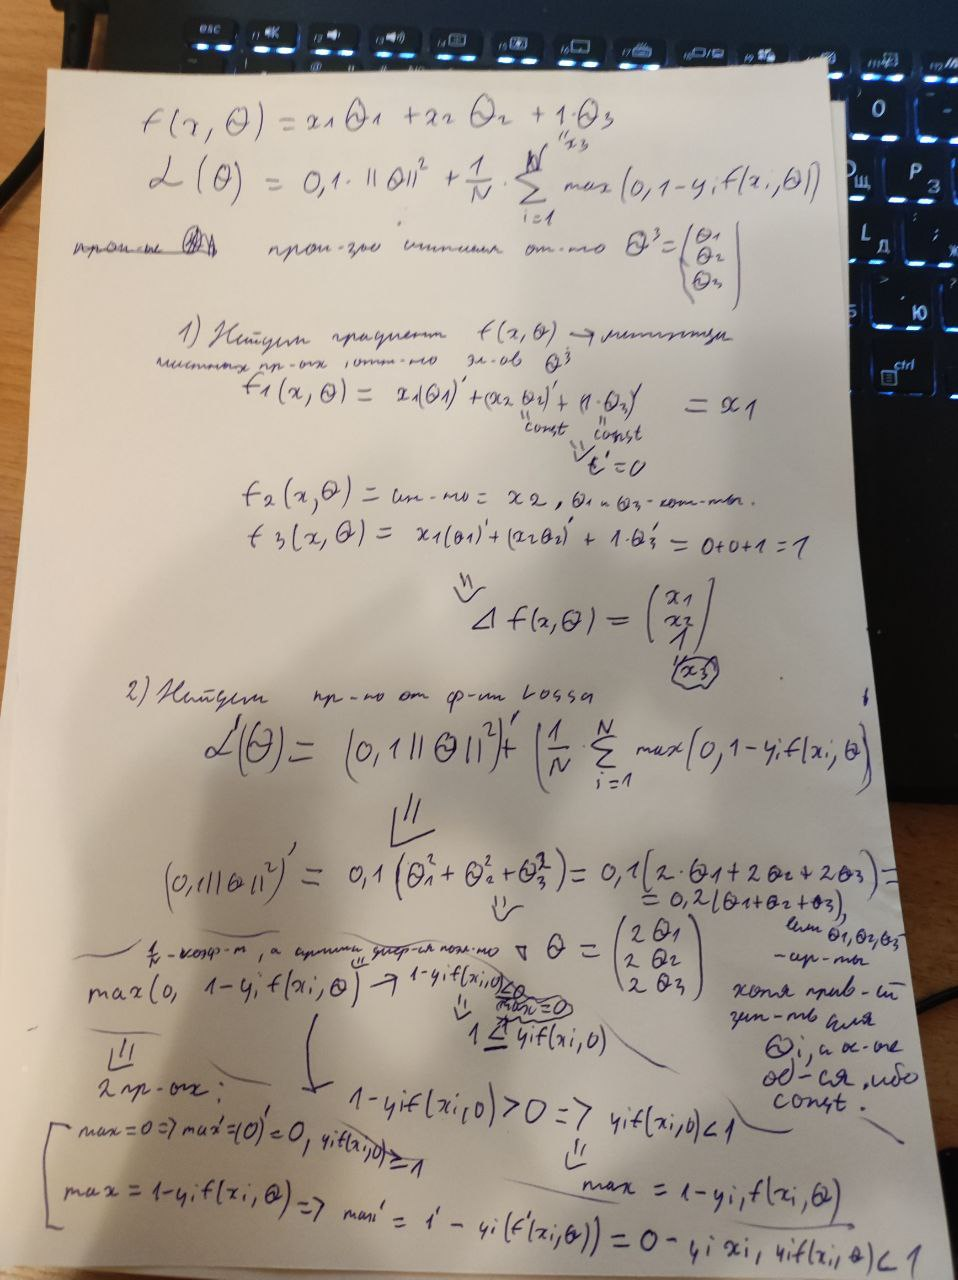
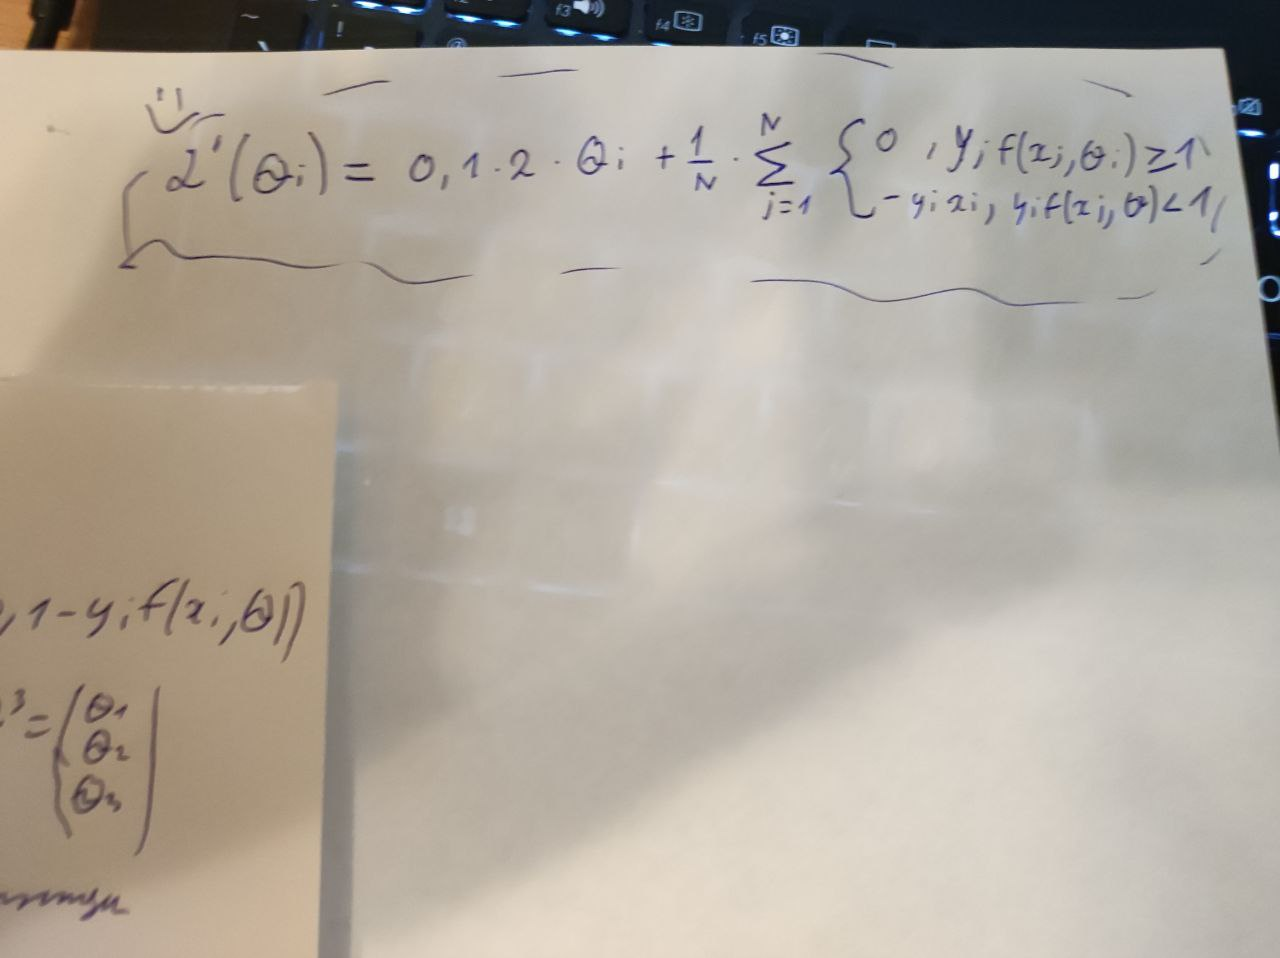

In [1]:
import numpy as np
import yaml

In [10]:
X = np.array([
    [0, 1,1],
    [1, 1,1],
    [1, 0,1],
    [-0.5, 0.5,1],
    [0, -0.5,1]
])

y = np.array([1, 1, 1, -1, -1])

theta0 = np.array([1.0, 1.0, 0.0])

lr = 0.1

def f(X, theta):
    return X[0]*theta0[0]+X[1]*theta0[1]+X[2]*theta0[2]

def loss(X, y, theta):
    theta = np.asarray(theta)
    maxx=np.sum(np.array([max(0, 1 - y[a] * f(X[a], theta)) for a in range(len(X))]))
    second_part = maxx/len(X)
    return 0.1 * np.linalg.norm(theta)**2 + second_part

print("Prediction:", [f(X[a], theta0) for a in range(len(X))])
print("Loss:", loss(X, y, theta0))

Prediction: [1.0, 2.0, 1.0, 0.0, -0.5]
Loss: 0.5


In [7]:
# Ваш код оптимизации.
def Step(X,y,thetacur,lr):
    gradient=np.array([0,0,0])
    for a in range (len(thetacur)):
        gradient[a]=0.1*2*thetacur[a]
        for b in range(len(X)):
            sum_max=0
            if(y[b]*f(X[b],thetacur)<1):
                sum_max=sum_max+y[b]*X[b][a]
            gradient[a]-=(1/len(X))*sum_max;
    return lr*gradient
def gradientus_spuskus(X,y,thetacur,lr):
    for java in range(1000):
        thetacur-= Step(X,y,thetacur,lr)




In [9]:
gradientus_spuskus(X,y,theta0,lr)
print("Prediction:", [f(X[a], theta0) for a in range(len(X))])
print("Loss:", loss(X, y, theta0))
theta=theta0
with open("submission.yaml", "w") as fp:
    yaml.safe_dump({"tasks": [{"task1": {"answer": theta.tolist()}}]}, fp)

Prediction: [1.0, 2.0, 1.0, 0.0, -0.5]
Loss: 0.5
